In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/kuisioner.csv')
dfc = df.copy()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                                                                                229 non-null    object
 1   Nama Lengkap                                                                                                                                                                             229 non-null    object
 2   Jenis Kelamin                         

In [4]:
iat_col = ["IAT-IAT_03","IAT-IAT_04","IAT-IAT_15","IAT-IAT_01","IAT-IAT_13","IAT-IAT_11","IAT-IAT_07",
           "IAT-IAT_02","IAT-IAT_18","IAT-IAT_06","IAT-IAT_19","IAT-IAT_17","IAT-IAT_14","IAT-IAT_16","IAT-IAT_12",
           "IAT-IAT_20","IAT-IAT_05","IAT-IAT_09","IAT-IAT_08","IAT-IAT_10"]
mapping_name = {
    'Jenis Kelamin': 'Basic_Demos-Sex',
    'Usia': 'Basic_Demos-Age',
    'Berapa Tinggi Badan Anda?': 'Physical-Height',
    'Berapa Berat Badan Anda?': 'Physical-Weight'
}
dfc.rename(columns=mapping_name, inplace=True)
dfc.rename(columns=dict(zip(dfc.iloc[:,8:28].columns, iat_col)), inplace=True)
dfc.rename(columns={dfc.columns[-1]:'PreInt_EduHx-computerinternet_hoursday'}, inplace=True)

In [5]:
dfc['Physical-Height'] = dfc['Physical-Height'].str.extract(r'(\d+)').astype(float)
dfc['Physical-Weight'] = dfc['Physical-Weight'].str.extract(r'(\d+)').astype(float)
dfc['Basic_Demos-Age'] = dfc['Basic_Demos-Age'].str.extract(r'(\d+)').astype(float)

In [6]:
# Fill missing height values by gender
height_median_male = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Height'].median()
height_median_female = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Height'].median()

dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Height'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Height'].fillna(height_median_male)
dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Height'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Height'].fillna(height_median_female)
# Fill missing weight values by gender
weight_median_male = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Weight'].median()
weight_median_female = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Weight'].median()

dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Weight'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Perempuan', 'Physical-Weight'].fillna(weight_median_female)
dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Weight'] = dfc.loc[dfc['Basic_Demos-Sex'] == 'Laki-laki', 'Physical-Weight'].fillna(weight_median_male)

In [7]:
dfc['Physical-Height'] = dfc['Physical-Height']/2.54  # Convert cm to inches
dfc['Physical-Weight'] = dfc['Physical-Weight']*2.20462  # Convert kg to pounds

In [8]:
dfc['IAT-IAT_Total'] = dfc[iat_col].sum(axis=1)
dfc['Basic_Demos-Sex'] = dfc['Basic_Demos-Sex'].map({'Laki-laki': 0, 'Perempuan': 1})

In [9]:
col_to_drop = ['Timestamp', 'Nama Lengkap','Angkatan', 'NIM', 'Basic_Demos-Sex']
dfc.drop(columns=col_to_drop, inplace=True)

In [10]:
index_col = ['Basic_Demos-Age', 'Physical-Height', 'Physical-Weight', 'IAT-IAT_01','IAT-IAT_02','IAT-IAT_03','IAT-IAT_04','IAT-IAT_05',
             'IAT-IAT_06','IAT-IAT_07','IAT-IAT_08','IAT-IAT_09','IAT-IAT_10','IAT-IAT_11','IAT-IAT_12',
             'IAT-IAT_13','IAT-IAT_14','IAT-IAT_15','IAT-IAT_16','IAT-IAT_17','IAT-IAT_18','IAT-IAT_19',
             'IAT-IAT_20', 'IAT-IAT_Total', 'PreInt_EduHx-computerinternet_hoursday']
dfc = dfc.reindex(columns=index_col)

In [11]:
dfc_2 = dfc.copy()

In [12]:
from joblib import load
scaler = load('model/scaler.pkl')
X_new = dfc.values
X_new_scaled = scaler.transform(X_new)

d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
ada_model = load('model/ada_model_noCV.pkl')
y_pred_ada = ada_model.predict(X_new_scaled)
dfc_2['sii'] = y_pred_ada
print("AdaBoost Model Prediction Results:")
print(dfc_2['sii'].value_counts())

d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AdaBoost Model Prediction Results:
sii
2.0    94
0.0    64
1.0    61
3.0    10
Name: count, dtype: int64


In [14]:
svm_model = load('model/svm_model_noCV.pkl')
y_pred_svm = svm_model.predict(X_new_scaled)
dfc['sii'] = y_pred_svm
print("SVM Model Prediction Results:")
print(dfc['sii'].value_counts())

SVM Model Prediction Results:
sii
2.0    145
1.0     54
0.0     25
3.0      5
Name: count, dtype: int64


d:\Kuliah\Skripsi\child-mind-institute-problematic-internet-use\.venv\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.8.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### **Demographic Visualization after prediction**

In [15]:
# result for SVM
df_svm = df.copy()
df_svm['sii'] = dfc['sii']
df_svm['iat_total'] = dfc['IAT-IAT_Total']

# result for AdaBoost
df_ada = df.copy()
df_ada['sii'] = dfc_2['sii']
df_ada['iat_total'] = dfc_2['IAT-IAT_Total']

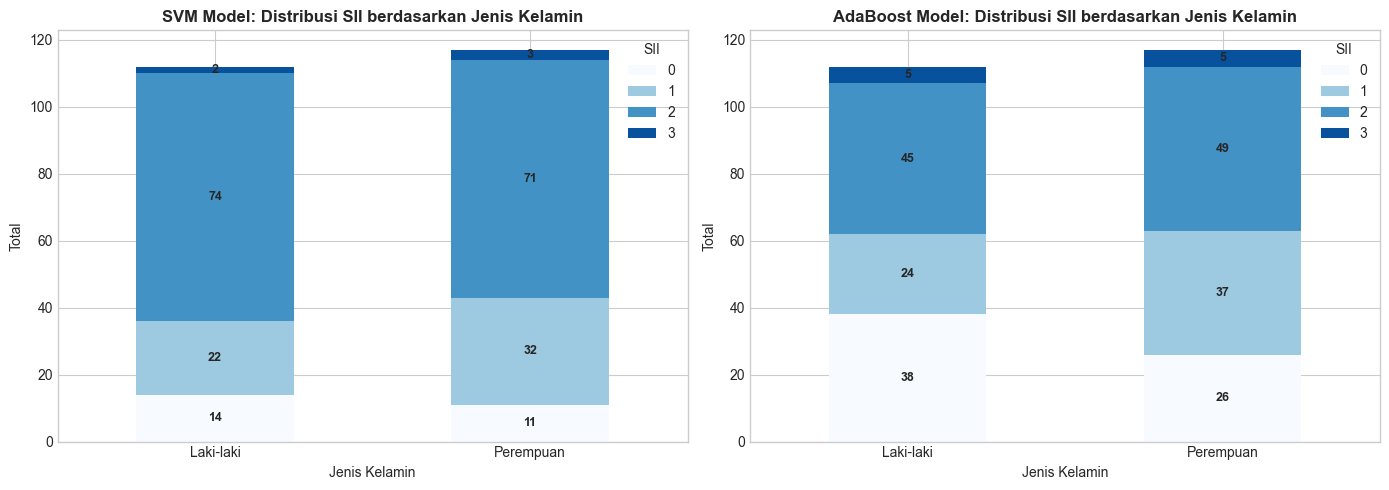

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')
# Comparison of SII predictions by Sex for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SVM Model
svm_sii_sex = df_svm.groupby(['Jenis Kelamin', 'sii']).size().unstack(fill_value=0)
svm_sii_sex.plot(kind='bar', stacked=True, ax=axes[0], color=['#F7FBFF', '#9ECAE1', '#4292C6', '#08519C'])
axes[0].set_title('SVM Model: Distribusi SII berdasarkan Jenis Kelamin', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Jenis Kelamin')
axes[0].set_ylabel('Total')
axes[0].legend(title='SII', labels=['0', '1', '2', '3'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Add count labels on stacked bars for SVM
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fontsize=9, fontweight='bold')

# AdaBoost Model
ada_sii_sex = df_ada.groupby(['Jenis Kelamin', 'sii']).size().unstack(fill_value=0)
ada_sii_sex.plot(kind='bar', stacked=True, ax=axes[1], color=['#F7FBFF', '#9ECAE1', '#4292C6', '#08519C'])
axes[1].set_title('AdaBoost Model: Distribusi SII berdasarkan Jenis Kelamin', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Jenis Kelamin')
axes[1].set_ylabel('Total')
axes[1].legend(title='SII', labels=['0', '1', '2', '3'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Add count labels on stacked bars for AdaBoost
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

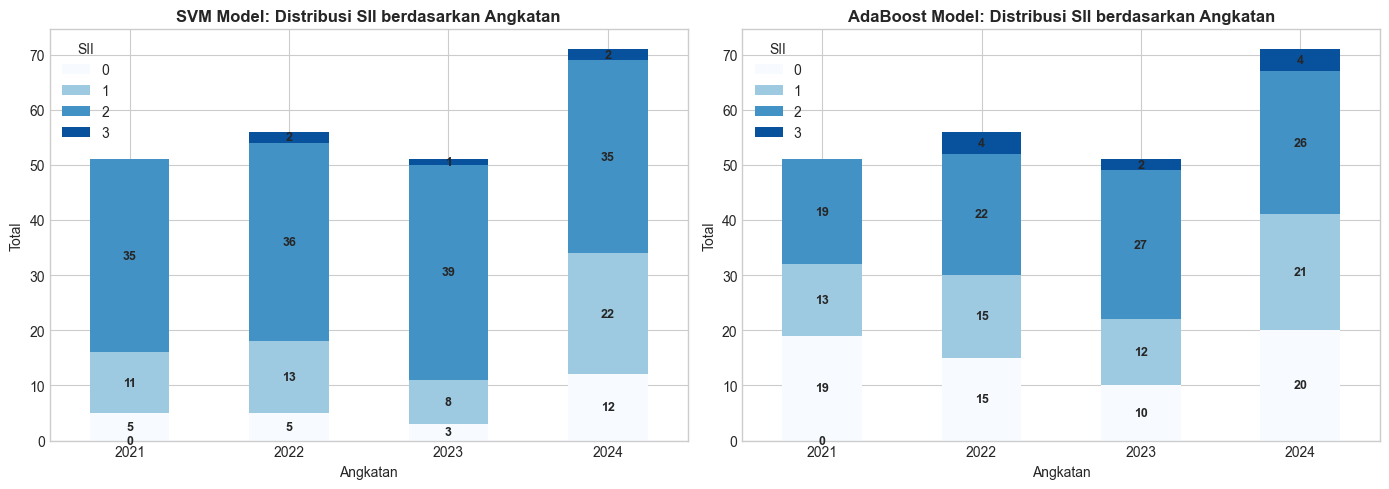

In [17]:
# Comparison of SII predictions by Angkatan for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SVM Model
svm_sii_angkatan = df_svm.groupby(['Angkatan', 'sii']).size().unstack(fill_value=0)
svm_sii_angkatan.plot(kind='bar', stacked=True, ax=axes[0], color=['#F7FBFF', '#9ECAE1', '#4292C6', '#08519C'])
axes[0].set_title('SVM Model: Distribusi SII berdasarkan Angkatan', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Angkatan')
axes[0].set_ylabel('Total')
axes[0].legend(title='SII', labels=['0', '1', '2', '3'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Add count labels on stacked bars for SVM
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fontsize=9, fontweight='bold')

# AdaBoost Model
ada_sii_angkatan = df_ada.groupby(['Angkatan', 'sii']).size().unstack(fill_value=0)
ada_sii_angkatan.plot(kind='bar', stacked=True, ax=axes[1], color=['#F7FBFF', '#9ECAE1', '#4292C6', '#08519C'])
axes[1].set_title('AdaBoost Model: Distribusi SII berdasarkan Angkatan', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Angkatan')
axes[1].set_ylabel('Total')
axes[1].legend(title='SII', labels=['0', '1', '2', '3'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Add count labels on stacked bars for AdaBoost
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

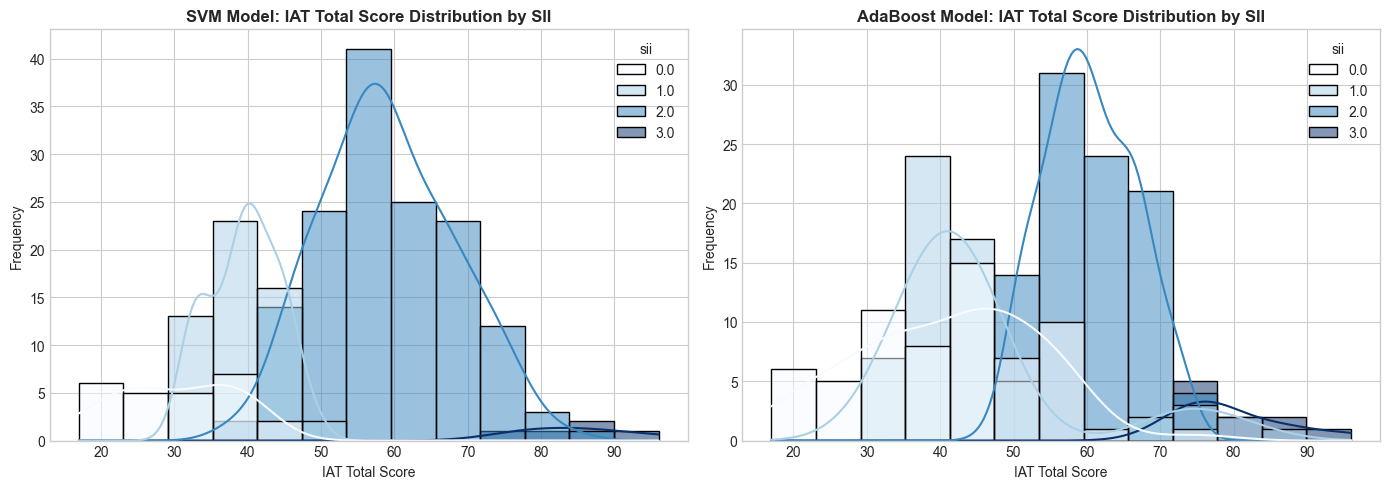

In [18]:
# Create histogram visualization with IAT_Total and color by SII
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SVM Model
sns.histplot(data=df_svm, x='iat_total', hue='sii', ax=axes[0], kde=True, palette='Blues')
axes[0].set_title('SVM Model: IAT Total Score Distribution by SII', fontsize=12, fontweight='bold')
axes[0].set_xlabel('IAT Total Score')
axes[0].set_ylabel('Frequency')

# AdaBoost Model
sns.histplot(data=df_ada, x='iat_total', hue='sii', ax=axes[1], kde=True, palette='Blues')
axes[1].set_title('AdaBoost Model: IAT Total Score Distribution by SII', fontsize=12, fontweight='bold')
axes[1].set_xlabel('IAT Total Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
df['sii'].value_counts()

KeyError: 'sii'

In [ ]:
df[df['sii'] == 1]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii
0,07/09/2025 21:12:26,Rahel Saffana Adya,Perempuan,2021,11210930000050,22,168,58,3,2,4,4,5,4,3,3,4,5,3,4,3,1,4,3,4,2,3,3,3,1.0
2,08/09/2025 9:35:01,Raihan Lail Ramadhan,Laki-laki,2021,11210930000035,21,164,61,5,3,3,4,4,5,5,4,3,4,4,3,2,3,5,3,3,3,3,2,3,1.0
3,08/09/2025 9:37:19,MSI,Laki-laki,2021,11210930000048,21,170,74,3,3,4,4,4,4,4,1,1,1,2,3,3,3,3,2,3,3,4,4,3,1.0
5,08/09/2025 9:39:25,muhammad ariq p,Laki-laki,2021,11210930000092,21,177,92,4,1,3,4,5,4,4,2,4,1,4,1,3,1,5,1,2,4,2,1,3,1.0
8,08/09/2025 9:50:19,Annisa Rizki Amaliah,Perempuan,2021,11210930000060,22,160,45,3,1,1,5,4,4,4,3,4,3,1,2,4,2,4,1,3,4,4,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,03/12/2025 15:04:54,Marshelia Azzahra,Perempuan,2022,11220930000017,21,NaN,NaN,5,1,1,5,5,4,1,4,4,1,4,2,3,0,5,1,2,3,5,1,3,1.0
225,03/12/2025 15:24:55,Adit Prasetyo,Laki-laki,2021,11210930000005,21,178,85,4,3,3,2,4,3,4,1,2,1,2,4,4,2,4,2,3,4,1,0,3,1.0
226,03/12/2025 15:25:51,Fahriza Abdillah,Laki-laki,2021,11210930000071,22,168,70,2,3,1,4,3,3,5,2,3,2,4,4,2,4,4,1,2,2,2,2,3,1.0
227,03/12/2025 15:52:01,Adhitya Naufal Ilhamdi,Laki-laki,2021,11210930000066,23,182,71,2,3,4,5,4,1,4,3,1,5,2,4,5,4,5,0,0,0,1,2,3,1.0


<Axes: xlabel='IAT-IAT_Total', ylabel='Count'>

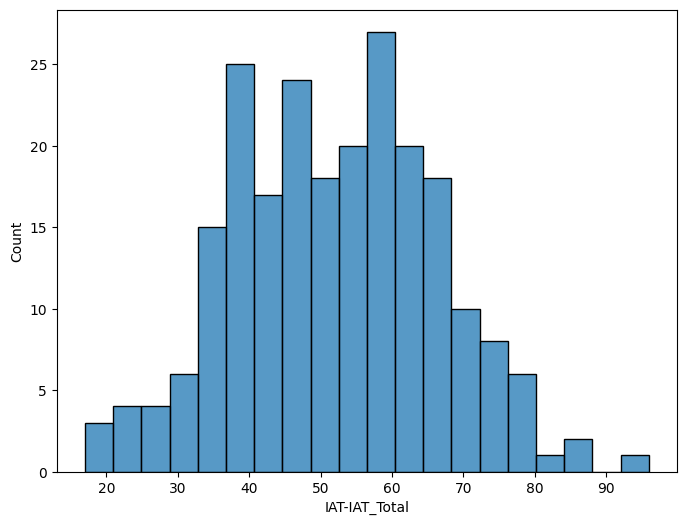

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data=dfc, x='IAT-IAT_Total', bins=20)

In [ ]:
df['iat_total'] = dfc['IAT-IAT_Total']

In [ ]:
df[df['iat_total'] > 90]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
68,12/10/2025 23:06:49,Alan,Laki-laki,2022,11220930000043,20,162,65,4,5,5,5,5,5,4,5,5,5,5,4,5,5,5,4,5,5,5,5,3,1.0,96


In [ ]:
df['sii'].value_counts()

sii
0.0    124
1.0    105
Name: count, dtype: int64

In [ ]:
df[df['sii'] == 1]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii
0,07/09/2025 21:12:26,Rahel Saffana Adya,Perempuan,2021,11210930000050,22,168,58,3,2,4,4,5,4,3,3,4,5,3,4,3,1,4,3,4,2,3,3,3,1.0
2,08/09/2025 9:35:01,Raihan Lail Ramadhan,Laki-laki,2021,11210930000035,21,164,61,5,3,3,4,4,5,5,4,3,4,4,3,2,3,5,3,3,3,3,2,3,1.0
3,08/09/2025 9:37:19,MSI,Laki-laki,2021,11210930000048,21,170,74,3,3,4,4,4,4,4,1,1,1,2,3,3,3,3,2,3,3,4,4,3,1.0
5,08/09/2025 9:39:25,muhammad ariq p,Laki-laki,2021,11210930000092,21,177,92,4,1,3,4,5,4,4,2,4,1,4,1,3,1,5,1,2,4,2,1,3,1.0
8,08/09/2025 9:50:19,Annisa Rizki Amaliah,Perempuan,2021,11210930000060,22,160,45,3,1,1,5,4,4,4,3,4,3,1,2,4,2,4,1,3,4,4,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,03/12/2025 15:04:54,Marshelia Azzahra,Perempuan,2022,11220930000017,21,NaN,NaN,5,1,1,5,5,4,1,4,4,1,4,2,3,0,5,1,2,3,5,1,3,1.0
225,03/12/2025 15:24:55,Adit Prasetyo,Laki-laki,2021,11210930000005,21,178,85,4,3,3,2,4,3,4,1,2,1,2,4,4,2,4,2,3,4,1,0,3,1.0
226,03/12/2025 15:25:51,Fahriza Abdillah,Laki-laki,2021,11210930000071,22,168,70,2,3,1,4,3,3,5,2,3,2,4,4,2,4,4,1,2,2,2,2,3,1.0
227,03/12/2025 15:52:01,Adhitya Naufal Ilhamdi,Laki-laki,2021,11210930000066,23,182,71,2,3,4,5,4,1,4,3,1,5,2,4,5,4,5,0,0,0,1,2,3,1.0


<Axes: xlabel='IAT-IAT_Total', ylabel='Count'>

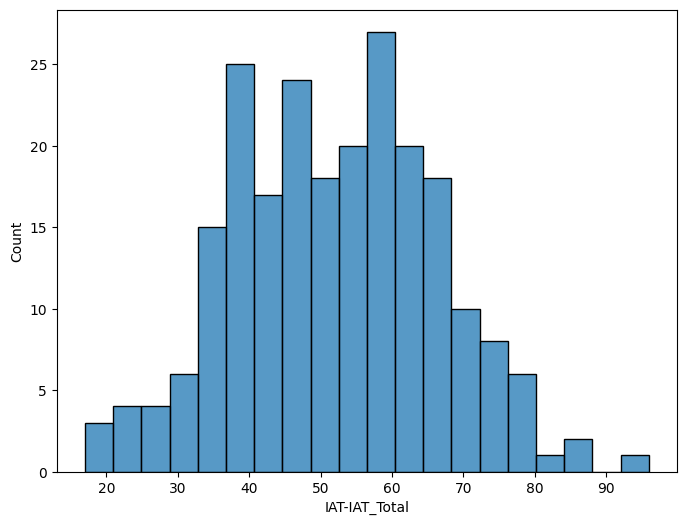

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data=dfc, x='IAT-IAT_Total', bins=20)

In [20]:
df_svm[df_svm['iat_total'] > 70]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
2,08/09/2025 9:35:01,Raihan Lail Ramadhan,Laki-laki,2021,11210930000035,21,164,61,5,3,3,4,4,5,5,4,3,4,4,3,2,3,5,3,3,3,3,2,3,2.0,71
11,08/09/2025 10:13:25,Muhammad Fathir Rizki,Laki-laki,2024,12409031030091,19,171 cm,76 kg,5,4,5,5,5,4,4,5,2,2,4,4,4,4,4,2,3,2,3,2,3,2.0,73
31,08/09/2025 20:13:21,Mizan Aade Arfani,Laki-laki,2021,11210930000042,22,173,68,4,3,4,4,4,4,4,4,4,3,4,4,4,1,4,2,4,3,4,4,3,2.0,72
33,08/09/2025 20:19:13,Akram Abdalla,Laki-laki,2021,11210930000067,22,NaN,NaN,4,1,4,4,5,5,5,5,5,3,4,4,5,2,4,4,2,1,3,1,3,2.0,71
36,08/09/2025 21:34:05,Nurfitri Ramadan,Perempuan,2023,11230930000085,19,160,50,5,5,3,4,4,4,3,3,4,3,3,3,4,3,4,3,4,5,5,2,3,2.0,74
38,08/09/2025 22:01:21,Caroline Oktaviani Suherman,Perempuan,2022,11220930000053,20,160,59,3,1,4,5,5,3,5,3,4,2,3,4,5,2,5,4,3,4,4,2,3,2.0,71
45,10/09/2025 21:47:50,Hikam Rizqillah Munandar,Laki-laki,2021,11210930000040,23,167,48,5,4,1,4,5,5,3,4,4,4,5,4,4,1,4,2,1,5,5,3,3,2.0,73
46,17/09/2025 9:17:08,Safira Maharani Wulandari,Perempuan,2023,11230930000008,20,NaN,NaN,5,5,5,5,5,5,4,5,5,3,5,3,4,3,5,2,4,2,5,4,3,2.0,84
49,19/09/2025 19:46:25,Abid Muzakki,Laki-laki,2023,11230930000117,20,174,65,4,5,4,5,4,4,4,4,3,3,4,4,4,2,4,4,4,4,4,3,3,3.0,77
55,11/10/2025 10:56:39,Raihan Dika,Laki-laki,2021,11210930000055,23,167,65,5,0,0,5,5,5,5,5,5,5,5,5,0,0,5,0,5,5,5,5,3,2.0,75


In [ ]:
df_ada[df_ada['iat_total'] > 70]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
2,08/09/2025 9:35:01,Raihan Lail Ramadhan,Laki-laki,2021,11210930000035,21,164,61,5,3,3,4,4,5,5,4,3,4,4,3,2,3,5,3,3,3,3,2,3,2.0,71
11,08/09/2025 10:13:25,Muhammad Fathir Rizki,Laki-laki,2024,12409031030091,19,171 cm,76 kg,5,4,5,5,5,4,4,5,2,2,4,4,4,4,4,2,3,2,3,2,3,2.0,73
31,08/09/2025 20:13:21,Mizan Aade Arfani,Laki-laki,2021,11210930000042,22,173,68,4,3,4,4,4,4,4,4,4,3,4,4,4,1,4,2,4,3,4,4,3,2.0,72
33,08/09/2025 20:19:13,Akram Abdalla,Laki-laki,2021,11210930000067,22,NaN,NaN,4,1,4,4,5,5,5,5,5,3,4,4,5,2,4,4,2,1,3,1,3,2.0,71
36,08/09/2025 21:34:05,Nurfitri Ramadan,Perempuan,2023,11230930000085,19,160,50,5,5,3,4,4,4,3,3,4,3,3,3,4,3,4,3,4,5,5,2,3,3.0,74
38,08/09/2025 22:01:21,Caroline Oktaviani Suherman,Perempuan,2022,11220930000053,20,160,59,3,1,4,5,5,3,5,3,4,2,3,4,5,2,5,4,3,4,4,2,3,1.0,71
45,10/09/2025 21:47:50,Hikam Rizqillah Munandar,Laki-laki,2021,11210930000040,23,167,48,5,4,1,4,5,5,3,4,4,4,5,4,4,1,4,2,1,5,5,3,3,1.0,73
46,17/09/2025 9:17:08,Safira Maharani Wulandari,Perempuan,2023,11230930000008,20,NaN,NaN,5,5,5,5,5,5,4,5,5,3,5,3,4,3,5,2,4,2,5,4,3,1.0,84
49,19/09/2025 19:46:25,Abid Muzakki,Laki-laki,2023,11230930000117,20,174,65,4,5,4,5,4,4,4,4,3,3,4,4,4,2,4,4,4,4,4,3,3,3.0,77
55,11/10/2025 10:56:39,Raihan Dika,Laki-laki,2021,11210930000055,23,167,65,5,0,0,5,5,5,5,5,5,5,5,5,0,0,5,0,5,5,5,5,3,0.0,75


In [ ]:
df_ada[df_ada['sii'] == 3]

,Timestamp,Nama Lengkap,Jenis Kelamin,Angkatan,NIM,Usia,Berapa Tinggi Badan Anda?,Berapa Berat Badan Anda?,"Seberapa sering Anda lebih memilih menghabiskan waktu di Internet dibandingkan dengan teman, keluarga, atau sosial lainnya?",Seberapa sering Anda menjalin hubungan baru (teman) dengan sesama pengguna online?,"Seberapa sering Anda merasa sibuk memikirkan internet saat sedang offline, atau membayangkan kapan akan online lagi","Seberapa sering Anda berkata pada diri sendiri, ""hanya beberapa menit lagi,"" saat sedang online?",Seberapa sering Anda online lebih lama dari yang Anda niatkan?,Seberapa sering Anda mencoba mengurangi jumlah waktu yang Anda habiskan online namun gagal?,Seberapa sering Anda memeriksa email atau pesan sebelum melakukan hal lain yang perlu Anda lakukan?,Seberapa sering Anda mengabaikan pekerjaan di rumah untuk menghabiskan lebih banyak waktu online?,Seberapa sering kinerja atau produktivitas pekerjaan Anda menurun karena internet?,Seberapa sering nilai atau hasil studi Anda menurun karena jumlah waktu yang Anda habiskan online?,Seberapa sering Anda lebih memilih untuk menghabiskan waktu online daripada pergi keluar dengan orang lain?,Seberapa sering Anda menantikan waktu berikutnya untuk bisa online?,"Seberapa sering Anda takut hidup tanpa internet akan terasa membosankan, hampa, dan tidak menyenangkan?","Seberapa sering Anda membentak, berteriak, atau bertindak jengkel jika seseorang mengganggu Anda saat sedang online?",Seberapa sering Anda kurang tidur karena sesi online hingga larut malam?,"Seberapa sering Anda merasa depresi, murung, atau gugup saat sedang offline, yang kemudian hilang begitu Anda kembali online?",Seberapa sering orang lain dalam hidup Anda mengeluh tentang jumlah waktu yang Anda habiskan online?,Seberapa sering Anda mencoba menyembunyikan berapa lama Anda telah online?,"Seberapa sering Anda menggunakan internet sebagai cara untuk lari dari masalah atau untuk meredakan perasaan tidak nyaman (misalnya, perasaan tidak berdaya, bersalah, cemas, depresi)?","Seberapa sering Anda membahayakan atau mempertaruhkan hilangnya hubungan penting, pekerjaan, atau kesempatan pendidikan/karier karena internet?",Berapa lama rata-rata Anda menggunakan internet dalam satu hari?,sii,iat_total
36,08/09/2025 21:34:05,Nurfitri Ramadan,Perempuan,2023,11230930000085,19,160,50,5,5,3,4,4,4,3,3,4,3,3,3,4,3,4,3,4,5,5,2,3,3.0,74
49,19/09/2025 19:46:25,Abid Muzakki,Laki-laki,2023,11230930000117,20,174,65,4,5,4,5,4,4,4,4,3,3,4,4,4,2,4,4,4,4,4,3,3,3.0,77
63,11/10/2025 20:56:20,Putra Ramadhan,Laki-laki,2022,11220930000123,20,173,56,5,4,4,5,4,3,4,3,4,3,5,3,2,4,3,4,3,3,4,4,3,3.0,74
68,12/10/2025 23:06:49,Alan,Laki-laki,2022,11220930000043,20,162,65,4,5,5,5,5,5,4,5,5,5,5,4,5,5,5,4,5,5,5,5,3,3.0,96
109,29/10/2025 21:24:41,Bevy Annisa Nurzahra,Perempuan,2024,12409031010020,19,151,53,4,4,5,4,5,3,5,3,4,4,4,4,3,4,4,4,3,4,4,4,2,3.0,79
151,16/11/2025 16:25:21,Aisyah Syifa Nur Azzahra,Perempuan,2024,124090310300073,19 tahun,160 cm,50 kg,3,5,3,3,5,5,5,5,4,3,4,4,5,5,5,4,4,5,4,5,3,3.0,86
177,19/11/2025 16:58:09,Yusrika Nur Iffadah,Perempuan,2022,11220930000093,21,164,56,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3.0,78
192,22/11/2025 21:27:05,Janniethia,Perempuan,2022,11220930000019,21,145,38,5,5,4,5,4,5,4,5,3,5,3,5,4,4,4,5,4,4,5,4,3,3.0,87
214,02/12/2025 22:52:44,Ahmad Haetami,Laki-laki,2024,12409031050139,20,175,64,3,4,4,3,4,3,3,4,4,4,4,4,4,4,4,3,3,4,3,3,3,3.0,72
215,02/12/2025 22:56:16,Adi Muhammad Zahrat,Laki-laki,2024,12409031010001,20,173,63,4,3,4,4,3,4,3,4,4,4,4,3,4,4,4,4,4,4,4,4,2,3.0,76
